In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 
import scipy.stats as stats 

In [2]:
data_path = f"./data/"

In [3]:
raw_medal_data = pd.read_excel(f"{data_path}Medals.xlsx")
medal_data = raw_medal_data.copy()
medal_data.head()

/home/whiskey/miniconda3/envs/nlp/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


## Estimate of location (Where is my Data !)

Mean: average value. 
$$ mean = \frac{\sum_{i}^n x_i}{n} $$

Weighted Mean: 

$$ mean = \frac{\sum_{i}^n w_i x_i}{\sum_{i}^n w_i}  $$

Reasons to use weighted mean: 
- Some values are more varibale than other, and highly varibale instances are given less weights. For instance, if we are taking an salary average from multiple group of employes, then we will reduce the weight of data from younger group.

Trimmed mean:

computed mean by dropping fixed number of sorted values at both end. It helps to eliminate the outliers.
$$ mean = \frac{\sum_{i=p+1}^{n-p} x_i}{n-2p} $$


In [4]:
# Mean 
medal_data["Total"].mean()

11.612903225806452

In [5]:
print(f'The weighted average of totla by gold medla: {np.average(medal_data["Total"], weights=medal_data["Gold"])}')

The weighted average of totla by gold medla: 46.832352941176474


In [6]:
def trimmed_mean(data, pct):
    if pct >= 1 or pct < 0: raise Exception("trim percentage is not valid !")
    trim_count = int(len(data) * pct)
    sorted_data = np.sort(data)
    trimmed_data = sorted_data[trim_count: -trim_count]
    t_mean = trimmed_data.mean()
    return t_mean, trimmed_data

In [7]:
t_mean, t_data = trimmed_mean(medal_data["Total"], 0.1)
print(f'10% trimmed mean of total medals: {t_mean}')

10% trimmed mean of total medals: 6.8933333333333335


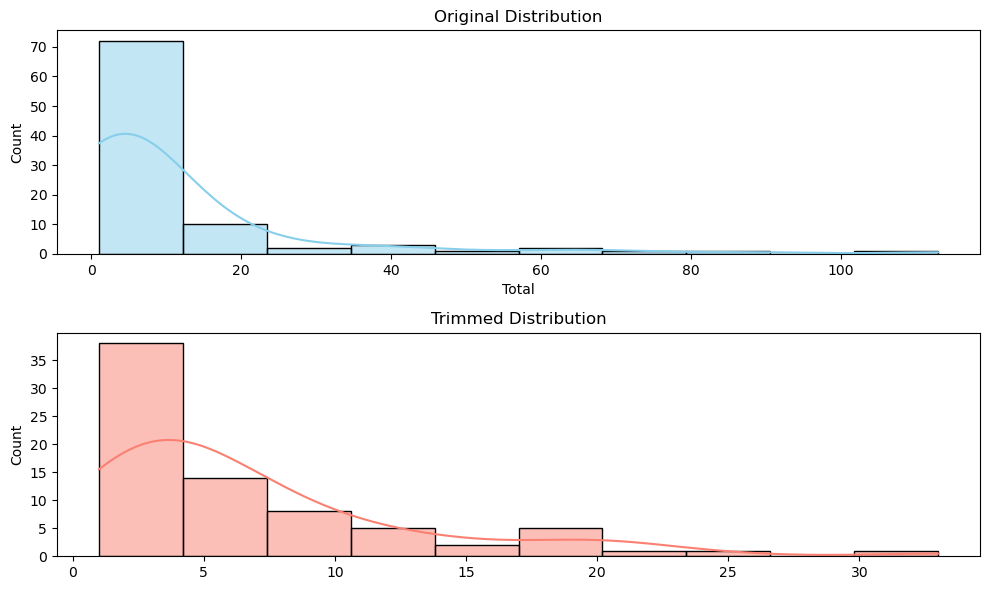

In [8]:
# Plot the original and trimmed distributions
plt.figure(figsize=(10, 6))

# Original Distribution
plt.subplot(2, 1, 1)
sns.histplot(medal_data["Total"], bins=10, kde=True, color='skyblue')
plt.title('Original Distribution')

# Trimmed Distribution
plt.subplot(2, 1, 2)
sns.histplot(t_data, bins=10, kde=True, color='salmon')
plt.title('Trimmed Distribution')

plt.tight_layout()
plt.show()

Median 

Middle number on sorted data. if there is even number of examples, then average of middle values. The median in roboust to outlier.

In [9]:
print(f'Median on Total: {medal_data["Total"].median()}')

Median on Total: 4.0


#### Takeaways 

- The basic metric for location is the mean, but it can be sensitive to
extreme values (outlier).
- Other metrics (median, trimmed mean) are more robust.

## Estimates of Variability: (Dispersion - How spread my data is !!)

**Deviation:**

The difference between the observed values and mean. Terms: errors, residuals. 
$$ deviation = x - \bar{x} $$

**Variance:**

The sum of squared deviations from the mean divided by n-1, where n is the number of data examples. Term: mean-squred-error.

$$ s^2 = \frac{\sum_{i}^n (x_i - \bar{x_i})}{n-1} $$

**Standard deviation:**

The squre root of variance. Term: L2-norm. Euclidain norm

$$ s = \sqrt{s^2} $$

**Mean absolute deviation:**

Absolute value of deviation from mean. Terms: L1-norm, Manhattan norm. 

$$ Mean absolute deviation = \frac{\sum_{i}^n |x_i - \bar{x_i}| }{n} $$

**Median Absolute Deviation:**

Absolute value of deviation from median. It is a robust estimate of variablility.

$$ MAD = Median( |x_1 - m|, |x_2 - m | ..... |x_n - m|) $$

**Range:**

The difference between smallest and largest value in data set. 

$$ Range = max(X) - min(X) $$

**order statistics:**

Metrics based on the data values sorted from smallest to biggest. Term: rank.

**IQR:**

The difference between 75th and 25th percentile. 

$$ IQR = Q3 - Q1 $$



In [10]:
medal_data.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


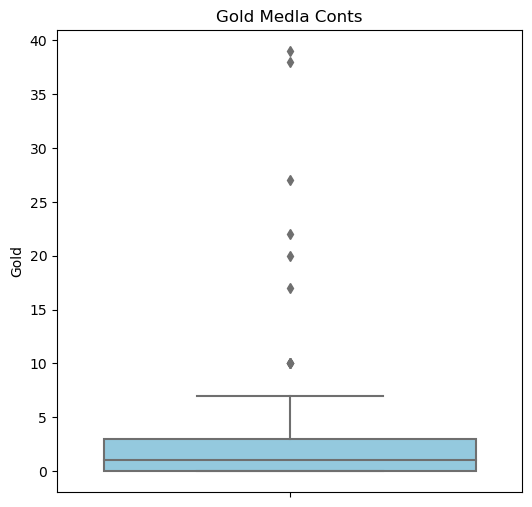

In [11]:
# box plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=medal_data["Gold"], color='skyblue')

# title and labels
plt.title('Gold Medla Conts')

plt.show()

In [12]:
print(f'Gold Medal varinace: {medal_data["Gold"].var()}, standard deviation: {medal_data["Gold"].std()}')

Gold Medal varinace: 49.31510051425906, standard deviation: 7.022471111671379


In [13]:
mean_ab_dev = abs(medal_data['Gold'] - medal_data["Gold"].mean()).sum() / medal_data.shape[0]
median_ab_dev = abs(medal_data["Gold"].sort_values() - medal_data["Gold"].median()).median()

print(f'Mean Absolute deviation: {mean_ab_dev}, median absolue deviation: {median_ab_dev}')

Mean Absolute deviation: 4.0048560527228565, median absolue deviation: 1.0


In [14]:
q1, q3  = medal_data["Total"].quantile([0.25, 0.75])
iqr = q3 - q1
print(f'Q1: {q1}, Q3: {q3}, IQR: {iqr}')

Q1: 2.0, Q3: 11.0, IQR: 9.0


#### Takeaways 

- Most popular statistics of variability are variance and standard deviation. 
- They are sensitive to outliers.
- Mean and Median absolute deviation from mean and percentile are robust to outliers. 



## Distribution 

- ***Boxplot***: A boxplot—with the top and bottom of the box at the 75th and 25th percentiles, respectively—also gives a quick sense of the distribution of the data; it is often used in side-by-side displays to compare distributions.
- ***Frequency table***: A frequency histogram plots frequency counts on the y-axis and variable values on the x-axis; it gives a sense of the distribution of the data at a glance.
- ***Density plot***: A density plot is a smoothed version of a histogram; it requires a function to estimate a plot based on the data
- ***Histogram*** 

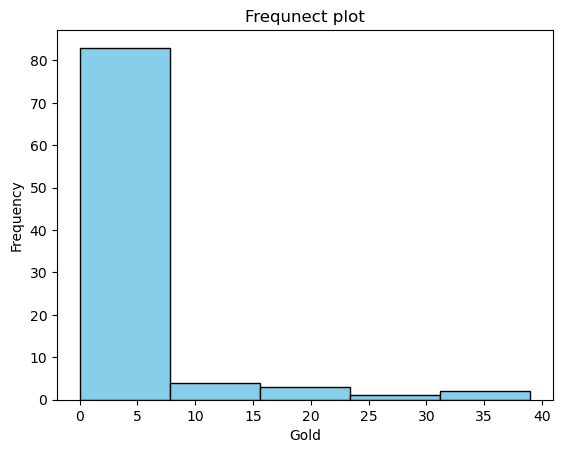

In [15]:
# frquenct table
plt.hist(medal_data["Gold"], bins=5, color="skyblue", edgecolor="black")
plt.title("Frequnecy plot")
plt.xlabel("Gold")
plt.ylabel('Frequency')
plt.show()

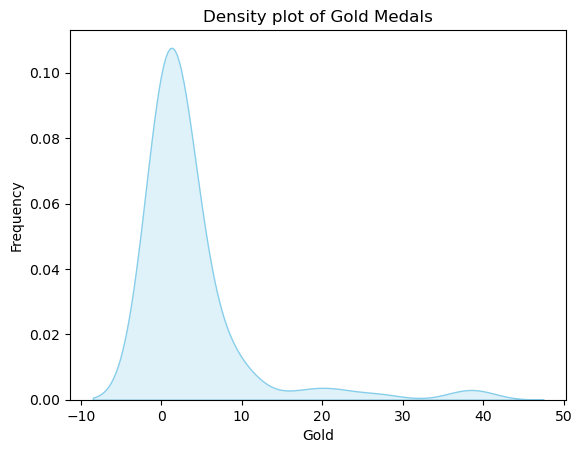

In [16]:
sns.kdeplot(medal_data["Gold"],color="skyblue", fill=True)
plt.title("Density plot of Gold Medals")
plt.xlabel("Gold")
plt.ylabel('Frequency')
plt.show()

Significantly skewed to right. We can use the following methods to make normal distribution.

- **Log Transformation** - positively skewed
- **Sqaure root Transformation**
- **Box-Cox Transformation**: Make sure all the values are greater than zero.
- **Yeo-Johnson Transformation**: Extension of box-cox, allows to handle zero or negative value.
- **Winsorizing** capping values to specified percentile. 
- **Categorizing or Bining**
- **Remove Outliers**




#### Moments in statistics

*In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. Skewness refers to whether the data is skewed to larger or smaller values and kurtosis indicates the propensity of the data to have extreme values.*


### Exploring Binary or Categorical Data

- **Mode**: The most commonly occuring category or values. 
- **Expected value**: The sum of values times their probability of occurrence, often used to sum up factor variable levels.
- **Bar chacrt**: The frerquency or proportion for each category plotted as bars.
- **Pie chart**: The frerquency or proportion for each category plotted as pie.

In [22]:
categorical_cols = medal_data.select_dtypes(include="object").columns.to_list()
print(f'Categorical features: {categorical_cols}')

Categorical features: ['Team/NOC']


In [19]:
print(f"Mode of dataset:\n {medal_data.loc[:, ['Rank', 'Gold', 'Silver', 'Bronze', 'Total','Rank by Total']].mode()}")

Mode of dataset:
    Rank  Gold  Silver  Bronze  Total  Rank by Total
0    86     0       1       1      1             77


In [20]:
# lets plot the number of gold, silver, and bronze medals by contry.


In [21]:


# Create the grouped bar plot
fig = px.bar(medal_data, x='Team/NOC', y=['Gold', 'Silver', 'Bronze'],
             labels={'value': 'Number of Medals', 'variable': 'Medal Type'},
             title='Number of Medals by Country and Type',
             barmode='group')

# Show the plot
fig.show()


### Correlation

It examines the correlation among features, and between feature (independent) and target (dependent) variables. It ranges from -1 ot 1. 

$$ Pearson's correlation coefficient: \frac{\sum_{i=1}^N (x_i - \bar x)(y_i - \bar y) } {\sqrt{\sum_{i=1}^N (x_i - \bar x)^2 (y_i - \bar y)^2}} $$
$$ : \frac{\sum_{i=1}^N (x_i - \bar x)(y_i - \bar y) } {(N-1) S_x S_y} $$

where $S_x$ and $S_y$ is standard deviation of variable $x$, and $y$, $n-1$ degree of freedom.

$$ r: \frac{Cov (X, Y) } {\sigma_x \sigma_y} $$

**Intepretation**:
- r=1 indicates a perfect positive linear relationship.
- r=−1 indicates a perfect negative linear relationship.
- r=0 indicates no linear relationship.


Terms:

- **Correlation coefficient**: a numeircal value that represents association with one another variable. 
- **Correlation matrix**: A $M\times M$ matrix with correlation coefficient among each other, where $M$ is number of variables in data.
- **Scatterplot**
- **Pairplot**

In [31]:
# compute correlation matrix
corr_mat = medal_data.drop(columns=["Team/NOC"], axis=1).corr()

In [32]:
# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(z=corr_mat.values, x=corr_mat.columns, y=corr_mat.columns, colorscale='Viridis'))

fig.update_layout(title='Correlation Matrix Heatmap')

# Show the plot
fig.show()

In [39]:
from plotly.subplots import make_subplots

scatter_data = medal_data.drop(columns=['Team/NOC'], axis=1)
# mkae scatter plot 
fig = make_subplots(rows=len(scatter_data.columns), cols=len(scatter_data.columns), subplot_titles=scatter_data.columns)

#fill the subplot 
for i in range(len(scatter_data.columns)):
    for j in range(len(scatter_data.columns)):
        fig.add_trace(go.Scatter(x=scatter_data.iloc[:, i], y=scatter_data.iloc[:, j], mode='markers'), row=i + 1, col=j + 1)
        
        if j == 0:
            fig.update_yaxes(title_text=scatter_data.columns[i], row=i + 1, col=j + 1)

#update layout
fig.update_layout(title='Pair Plot', height=800, width=1800)
fig.show()

### Exploring two or more variables | (Bivariate or Multivariate Analysis)

- **Hexagonal binning**: A plot of two numeric variables with the records binned into hexagons. In hexagonal binning, the scatter plot area is divided into hexagonal bins, and the number of data points falling within each hexagon is represented by color intensity or height. This provides a more interpretable representation of the data distribution, especially when dealing with dense datasets.
- **Contour plots**: A plot showing the density of two numeric variables like a topographical map.
- **Voilin plots**: A box plot with density estimate.

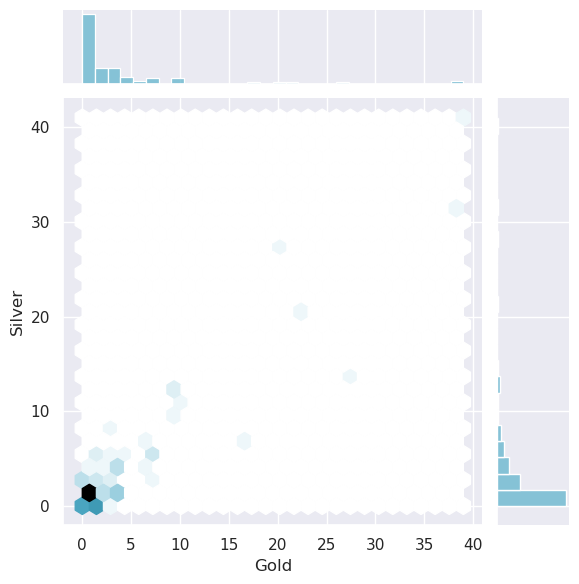

In [84]:
sns.set_theme(style='darkgrid')

sns.jointplot(x=scatter_data["Gold"], y=scatter_data['Silver'], kind='hex', color='c')
plt.xlabel("Gold")
plt.ylabel('Silver')
plt.show()

In [106]:
# # contour plot 
# contour plot 
# sns.kdeplot(x=scatter_data["Gold"], y=scatter_data["Silver"])
# plt.xlabel("Gold")
# plt.ylabel('Silver')
# plt.show()

# contour plot 
fig = px.density_contour(scatter_data, x="Gold", y="Silver", marginal_x="histogram", marginal_y="histogram")
fig.update_layout(width=800, height=400, title='Contour plot among Gold and Silver medals')
fig.show()

In [107]:
# lets plot violin plots 
medal_data["Team/NOC"]
fig = px.violin(medal_data, x="Gold", box=True, points='all', hover_data=medal_data.columns)
fig.update_layout(width=800, height=400, title='Violin plot of Gold Medals')
fig.show()